CSML1010_Group3_Course_Project_Data_Exploration - Group3: Paul Doucet, Jerry Khidaroo

In [1]:
# filter warnings on depreciation etc.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import pandas, numpy
import pandas as pd
import numpy as np

# adjust pandas display
pd.options.display.max_columns = 30
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.precision = 2
pd.options.display.max_colwidth = -1

In [3]:
# Import matplotlib and seaborn and adjust some defaults
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100

import seaborn as sns
sns.set_style("whitegrid")

Load Data

In [4]:
import sqlite3

sql = """
SELECT p.*
FROM posts_nlp p
"""

with sqlite3.connect('selfdialogs.db') as con:
    df = pd.read_sql_query(sql, con)

Data Exploration

In [5]:
# list column names and datatypes
df.dtypes

index                    int64  
id                       object 
Conversation             object 
Instruction_id           object 
selfdialog_clean         object 
selfdialog_lemma         object 
selfdialog_nouns         object 
selfdialog_adjectives    object 
selfdialog_verbs         object 
selfdialog_nav           object 
no_tokens                float64
dtype: object

In [6]:
# select a sample of some data frame columns
df[['id', 'Conversation', 'Instruction_id']] \
  .sample(2, random_state=42)

,id,Conversation,Instruction_id
6482,dlg-d601e9c1-f9b4-4778-ae20-29f5ab6edd72,Hello can you please book a reservation at the crawling crab for tonight at 7:30 for 3 people There is no table available at that time how about 8:00 pm Ok That table is outside is that ok No that won’t work Ok is there another restaurant that you would like to try Yes how about the crying tree Same Time and party? Yes Ok I will book the table would you like the restaurant to send u a text confirmation Yes Ok what phone number 867 5309 Ok they will text u around 15 minutes before the table is ready to confirm the table Ok Do you want to order drinks to have ready when you arrive. Yes please order 2 glasses of red wine Ok they will have your drinks ready Ok To confirm I have a table for 3 ready at the crying tree for today at 7:30 wine will be ordered prior to arriving they will text to confirm is this correct Yes Ok your good to go,restaurant-table-2
6872,dlg-e3797e80-a033-47d3-be9f-3235ea00f09c,"Hi, I would like for you to order a car for me From where would you like to leave? Bank of America Stadium, South Mint Street, Charlotte, NC And where will you be going? Romare Bearden Park, South Church Street, Charlotte, NC An UberX is $6.65 Is UberXL available? UberXL is available for 7.75. Are there any other options? Black is available for 15.00 and Black SUV is available for 25.00 I would like to book UberXL. You would like to book UberXL for 7.75? Yes, that's correct. Ok I am booking your UberXL now. Thank you. Do you have any other requests? How much was the total in the end? It was $7.75. When can I expect my UberXL to arrive? Your ride is on the way and you can check your status on your phone. Thanks!",uber-lyft-1


In [7]:
# length of a dataframe
len(df)

7708

In [8]:
# number of values per column
df.count()

index                    7708
id                       7708
Conversation             7708
Instruction_id           7708
selfdialog_clean         7708
selfdialog_lemma         7708
selfdialog_nouns         7708
selfdialog_adjectives    7708
selfdialog_verbs         7708
selfdialog_nav           7708
no_tokens                7708
dtype: int64

In [9]:
# size info, including memory consumption
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7708 entries, 0 to 7707
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  7708 non-null   int64  
 1   id                     7708 non-null   object 
 2   Conversation           7708 non-null   object 
 3   Instruction_id         7708 non-null   object 
 4   selfdialog_clean       7708 non-null   object 
 5   selfdialog_lemma       7708 non-null   object 
 6   selfdialog_nouns       7708 non-null   object 
 7   selfdialog_adjectives  7708 non-null   object 
 8   selfdialog_verbs       7708 non-null   object 
 9   selfdialog_nav         7708 non-null   object 
 10  no_tokens              7708 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 34.9 MB


Column Exploration

In [10]:
columns = [col for col in df.columns if not col.startswith('self')]
columns

['index', 'id', 'Conversation', 'Instruction_id', 'no_tokens']

In [11]:
# describe categorical columns of type np.object 
df[['Instruction_id']] \
  .describe(include=np.object) \
  .transpose()

,count,unique,top,freq
Instruction_id,7708,15,pizza-ordering-2,1211


In [12]:
df['Instruction_id'].value_counts()[:10]

pizza-ordering-2      1211
auto-repair-appt-1    1161
coffee-ordering-1     735 
restaurant-table-1    704 
uber-lyft-1           646 
movie-tickets-1       642 
coffee-ordering-2     641 
restaurant-table-2    494 
uber-lyft-2           452 
movie-tickets-2       377 
Name: Instruction_id, dtype: int64

In [13]:
# describe numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,7708.00,3853.50,2225.25,0.00,1926.75,3853.50,5780.25,7707.00
no_tokens,7708.00,228.52,80.58,20.00,175.00,215.00,267.00,1336.00


Text Category Exploration

In [16]:
# group by category, count distinct subreddits and posts
cat_df = df.groupby('Instruction_id') \
           .agg({'Instruction_id': pd.Series.nunique,
                 'id': pd.Series.count}) \
           .rename(columns={'Instruction_id': 'num_Instruction_ids',
                            'id': 'num_posts'}) \
           .sort_values('num_Instruction_ids', ascending=False)
            
# show top 5 records
cat_df.head(5)

,num_Instruction_ids,num_posts
Instruction_id,,
auto-repair-appt-1,1,1161
coffee-ordering-1,1,735
coffee-ordering-2,1,641
movie-finder,1,54
movie-ticket-1,1,37


In [17]:
cat_df.describe()

,num_Instruction_ids,num_posts
count,15.00,15.00
mean,1.00,513.87
std,0.00,362.43
min,1.00,37.00
25%,1.00,226.00
50%,1.00,494.00
75%,1.00,675.00
max,1.00,1211.00


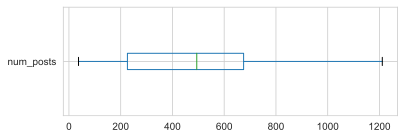

In [18]:
# horizontal boxplot of a dataframe column
cat_df[['num_posts']].plot(kind='box', vert=False, figsize=(6, 2));

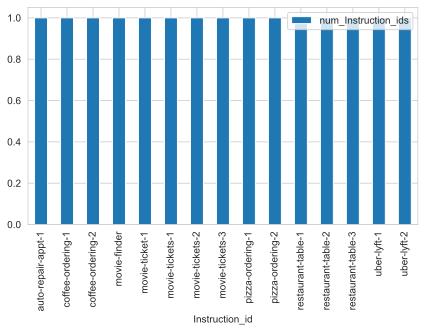

In [19]:
# bar chart of a dataframe column
cat_df[['num_Instruction_ids']].plot(kind='bar', figsize=(7,4));

Word Exploration

In [22]:
# create a data frame slice
sub_df = df[df['Instruction_id']=='movie-finder']

# sample cleaned text and tokens tagged as nouns
sub_df[['selfdialog_clean', 'selfdialog_nouns']].sample(2)

,selfdialog_clean,selfdialog_nouns
3667,"Find me a romance movie starring Tom Hanks. A popular romantic movie starring Tom Hanks is When Harry Meet Sally. Would you like me to play it? No. I've seen that one. Is there another one? Another popular movie is Sleepless in Seattle. No, I've seen that one too many times too? Is there another one? Another movie is Big. No. That movie is too old. How about another movie? The most popular Tom Hanks movie is Forrest Gump. No. That movie is too sad. I'd like another Tom Hanks romance. I also have You've Got Mail. How long is You've Got Mail? The movie is two hours long. Who else stars in You've Got Mail? Tom Hanks stars with Meg Ryan. Who is the director? The director is Nora Ehphon.",romance movie starring Tom Hanks movie starring Tom Hanks Harry Meet Sally movie Sleepless Seattle time movie movie movie Tom Hanks movie Forrest Gump movie Tom Hanks romance Got Mail Got Mail movie hour Got Mail Tom Hanks Meg Ryan director director Nora Ehphon
4974,Hi I am looking for a movie to watch at home Hi ok great. What type of movie do you want to watch? Hmmm...maybe a romantic comedy or Christmas movie OK lets start with romantic comedy. Have you seen Crazy Rich Asians You know I have been wanting to see that. I will kep that on my list. What else? For a Christmas movie we can do It's A Wonderful Life Oh boy that will pull at my heart strings for sure. Maybe something else. Are you looking for a sappy or upbeat Christmas movie. Let's do upbeat. Christmas With The Kranks is always a good one. Nah I am not in the mood for that. OK how about Lampoons Chrismtas Vacation That is definitely a good one. Another one is The Elf Yes I have seen that a million times but it is a good one. I suggest Crazy Rich Asians or The Polar Express I do love me some Tom Hank! Great I hope I was helpful. You were thank you! You are welcome,movie home type movie comedy Christmas movie ok let comedy Crazy Rich Asians list Christmas movie life boy heart string sappy Christmas movie upbeat Christmas Kranks mood lampoon Chrismtas Vacation one one Elf time Crazy Rich Asians Polar Express Tom Hank


Create Token List

In [23]:
def my_tokenizer(text):
    return text.split() if text != None else []

In [25]:
# transform list of documents into a single list of tokens
tokens = sub_df.selfdialog_nouns.map(my_tokenizer).sum()

In [26]:
from collections import Counter

counter = Counter(tokens)
counter.most_common(20)

[('movie', 258),
 ('action', 36),
 ('comedy', 34),
 ('tonight', 30),
 ('one', 23),
 ('mood', 22),
 ('film', 22),
 ('time', 20),
 ('genre', 19),
 ('Netflix', 19),
 ('thank', 17),
 ('suggestion', 16),
 ('kind', 15),
 ('Star', 15),
 ('rating', 15),
 ('year', 14),
 ('preference', 14),
 ('Wars', 14),
 ('home', 13),
 ('horror', 12)]

In [27]:
df.Instruction_id.unique()

array(['restaurant-table-2', 'movie-tickets-1', 'movie-tickets-3',
       'pizza-ordering-2', 'coffee-ordering-1', 'auto-repair-appt-1',
       'uber-lyft-1', 'movie-tickets-2', 'uber-lyft-2',
       'pizza-ordering-1', 'movie-ticket-1', 'coffee-ordering-2',
       'movie-finder', 'restaurant-table-1', 'restaurant-table-3'],
      dtype=object)

In [28]:
print([t[0] for t in counter.most_common(200)])  

['movie', 'action', 'comedy', 'tonight', 'one', 'mood', 'film', 'time', 'genre', 'Netflix', 'thank', 'suggestion', 'kind', 'Star', 'rating', 'year', 'preference', 'Wars', 'home', 'horror', 'actor', 'ticket', 'problem', 'sir', 'sci', 'fi', 'recommendation', 'list', 'hour', 'drama', 'lot', 'theater', 'type', 'fan', 'classic', 'mind', 'Assistant', 'day', 'Tom', 'IMDB', 'Jedi', 'John', 'Black', 'minute', 'trailer', 'World', 'romance', 'thriller', 'documentary', 'choice', 'help', 'book', 'review', 'Amazon', 'name', 'fantasy', 'night', 'Wick', 'Panther', 'popcorn', 'adventure', 'director', 'release', 'Jurassic', 'Hanks', 'show', 'master', 'star', 'Quiet', 'Place', 'cast', 'showing', 'text', 'Adam', 'option', 'way', 'Episode', 'Blade', 'Runner', 'Alien', 'Empire', 'Galaxy', 'Rosemary', 'demand', 'Kung', 'Fu', 'assistant', 'Avengers', 'Got', 'theme', 'space', 'hero', 'crime', 'wife', 'today', 'Christmas', 'Airplane', 'Marvel', 'Mission', 'month', 'Incredibles', 'thing', 'table', 'Player', 'One

In [29]:
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    """Remove stopwords from a list of tokens."""
    return [t for t in tokens if t not in STOP_WORDS]

# rebuild counter
counter = Counter(remove_stopwords(tokens))

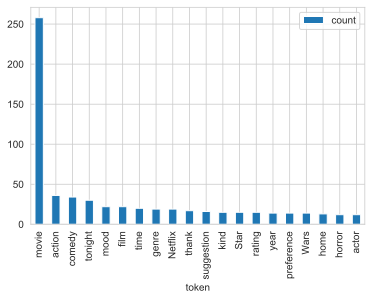

In [30]:
# convert list of tuples into data frame
freq_df = pd.DataFrame.from_records(counter.most_common(20),
                                    columns=['token', 'count'])

# create bar plot
freq_df.plot(kind='bar', x='token');

Exploring Word Clouds

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

In [32]:
from wordcloud import WordCloud

def wordcloud(counter):
    """A small wordloud wrapper"""
    wc = WordCloud(width=1200, height=800, 
                   background_color="white", 
                   max_words=200) 
    wc.generate_from_frequencies(counter)

    # Plot
    fig=plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

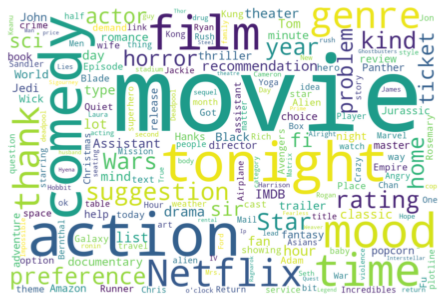

In [33]:
# create wordcloud
wordcloud(counter)

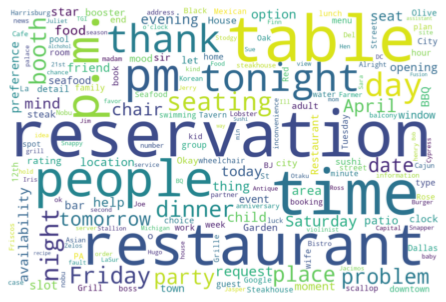

In [35]:
tokens2 = df[df['Instruction_id']=='restaurant-table-3'].selfdialog_nouns \
         .map(my_tokenizer).sum()

counter2 = Counter(remove_stopwords(tokens2))
wordcloud(counter2)

Exploring Complexity

In [37]:
df['no_tokens'] = df.selfdialog_lemma\
  .map(lambda l: 0 if l==None else len(l.split()))

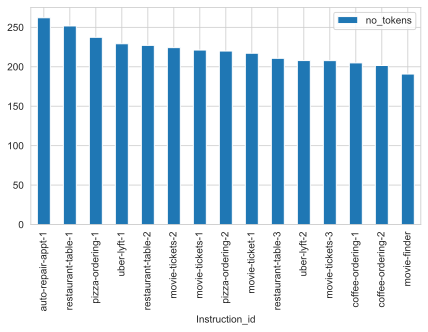

In [38]:
# mean number of tokens by category
df.groupby(['Instruction_id']) \
  .agg({'no_tokens':'mean'}) \
  .sort_values(by='no_tokens', ascending=False) \
  .plot(kind='bar', figsize=(7,4));

In [39]:
# render plots as retina or png, because svg is very slow
%config InlineBackend.figure_format = 'retina'

import seaborn as sns

def multi_boxplot(data, x, y, ylim = None):
    '''Wrapper for sns boxplot with cut-off functionality'''
    # plt.figure(figsize=(30, 5))
    fig, ax = plt.subplots()
    plt.xticks(rotation=90) 

    # order boxplots by median
    ordered_values = data.groupby(x)[[y]] \
                         .median() \
                         .sort_values(y, ascending=False) \
                         .index
        
    sns.boxplot(x=x, y=y, data=data, palette='Set2', 
                order=ordered_values)

    fig.set_size_inches(11, 6)
    
    # cut-off y-axis at value ylim
    ax.set_ylim(0, ylim)

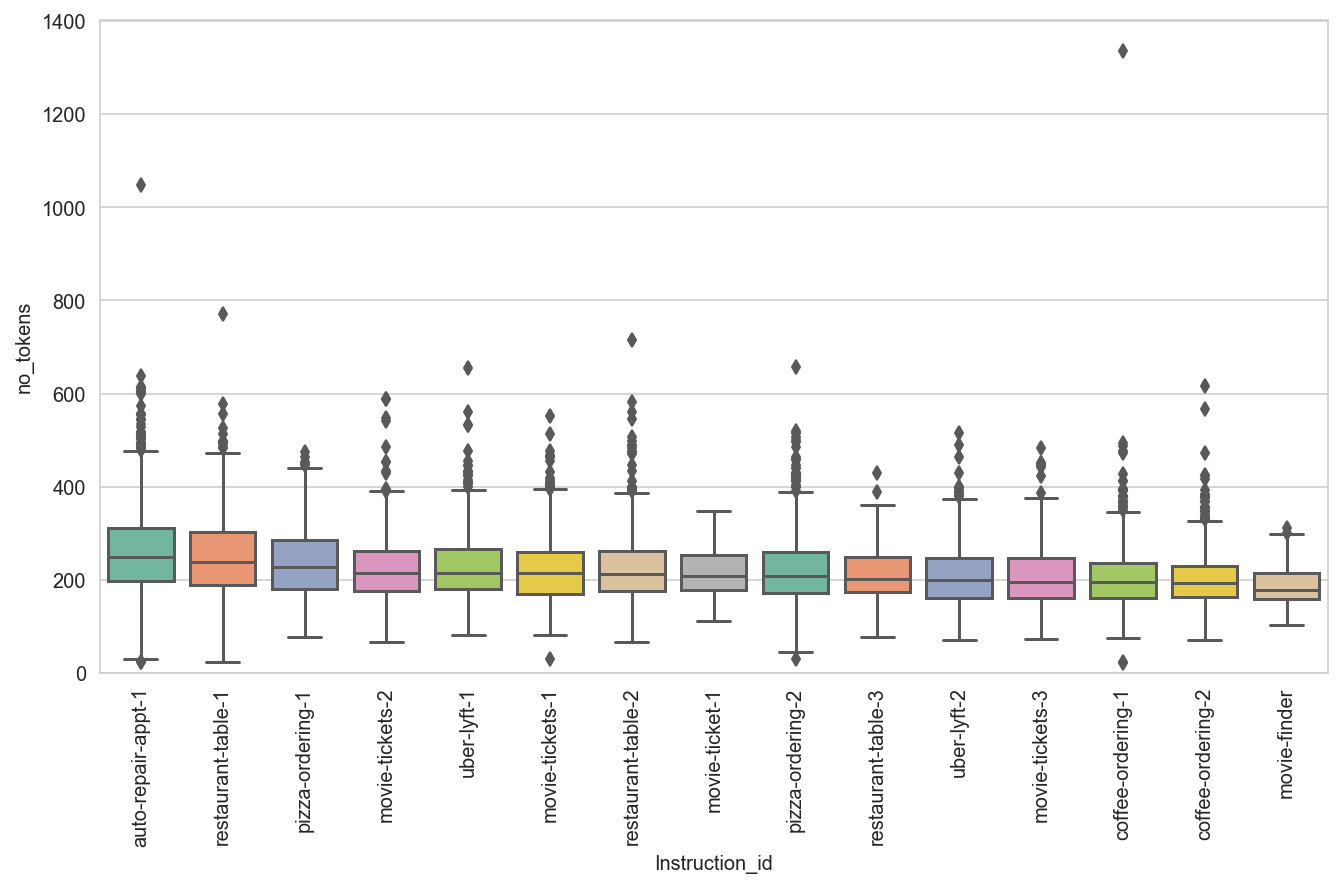

In [40]:
multi_boxplot(df, 'Instruction_id', 'no_tokens');

In [41]:
# print text of outliers
df['selfdialog_lemma'][df.no_tokens > 1500]

Series([], Name: selfdialog_lemma, dtype: object)

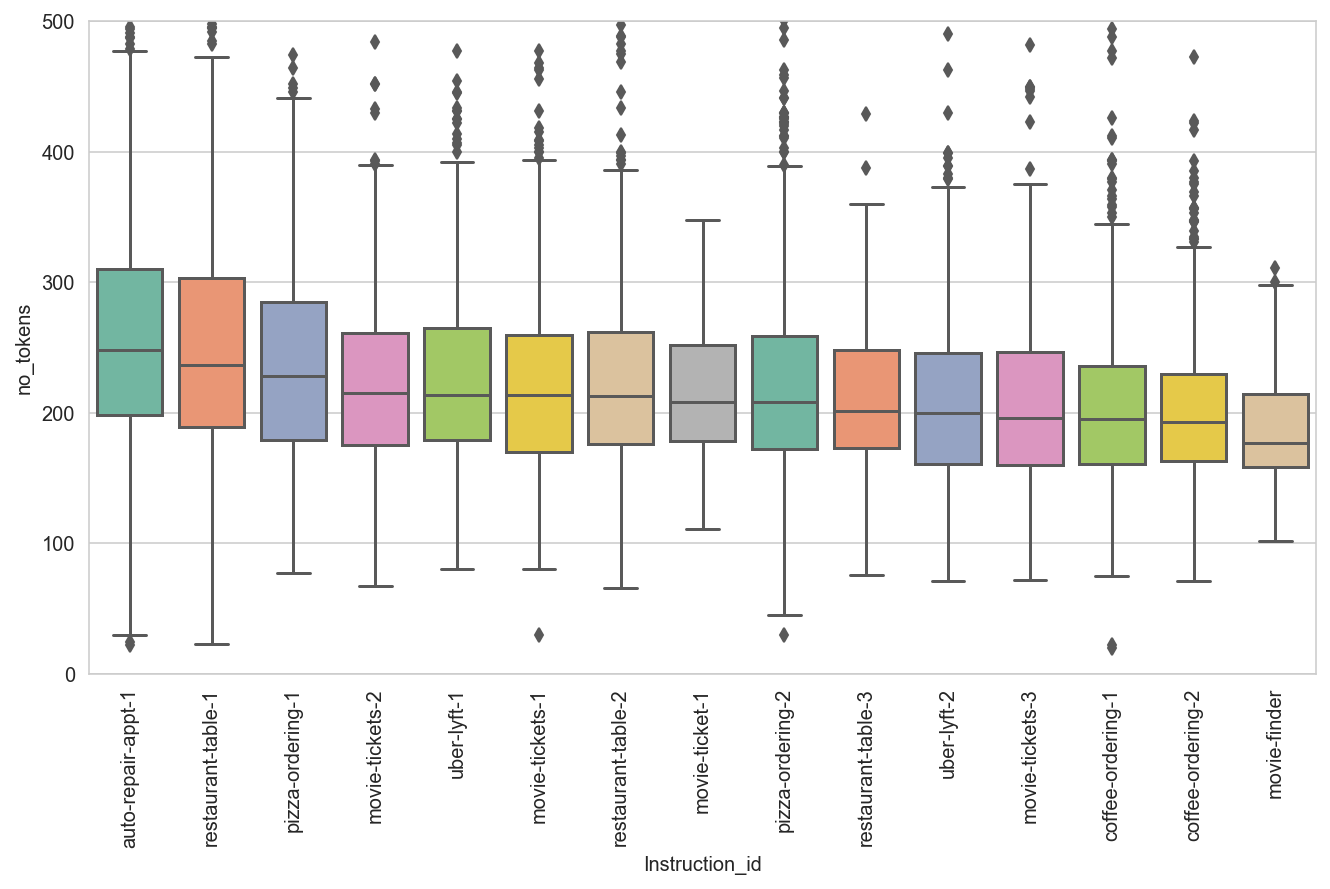

In [42]:
# cut-off diagram at y=500
multi_boxplot(df, 'Instruction_id', 'no_tokens', ylim=500)

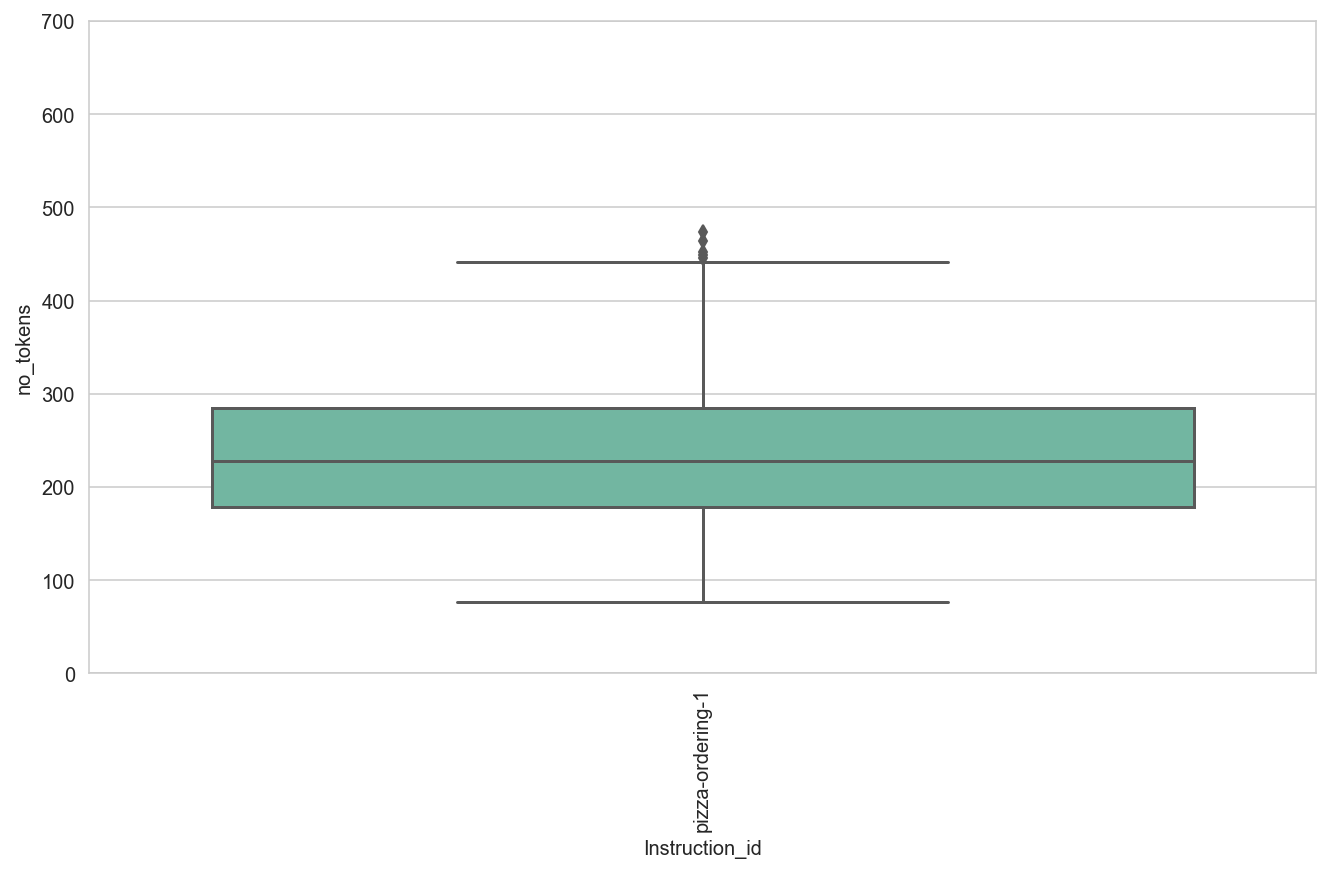

In [43]:
# comparing subreddits within a single category
multi_boxplot(df[df.Instruction_id=='pizza-ordering-1'], 
              'Instruction_id', 'no_tokens', ylim=700)